# Initialize Datasets
## Places

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import json
from tqdm import tqdm

### Dataset Parameters

In [2]:
ds_path = "../../data/places_dump_US.geojson"
output_dir = "../../data/exported/"

num_objects = 100000 * 2
num_queries = 2500000

should_scale = True
grid_range = 512
spatial_uni = True

seed = 7

### Load Data

In [3]:
content = []

with open(ds_path, "r") as f:
    place_id = 0
    for i, line in tqdm(enumerate(f)):
        if (len(content) >= num_objects + num_queries):
            break

        place = json.loads(line)
        if ('id' in place and 'properties' in place and 'tags' in place['properties']):
            
            content.append({
                "id": place_id,
                "x": place['geometry']['coordinates'][0],
                "y": place['geometry']['coordinates'][1],
                "keywords": place['properties']['tags'],
                "scaled": False
            })
            place_id += 1;


df = pd.DataFrame(content)
df.head()

3688890it [00:33, 109668.67it/s]


,id,x,y,keywords,scaled
0,0,-149.879187,61.215592,[mental],False
1,1,-149.865410,61.207108,[vitamin],False
2,2,-151.288153,60.661282,[repair],False
3,3,-134.585427,58.375872,"[tackle, parts, fishing]",False
4,4,-149.858773,61.105785,"[food, covered, crop]",False


### Pre-process

In [4]:
def scale(c, minc, maxc):
    return (c - minc) * grid_range / (maxc - minc)


if should_scale and not spatial_uni:
    minx = df['x'].min()
    miny = df['y'].min()
    maxx = df['x'].max()
    maxy = df['y'].max()
    
    df['x'] = df['x'].apply(lambda x: scale(x, minx, maxx))
    df['y'] = df['y'].apply(lambda y: scale(y, miny, maxy))
    df['scaled'] = True

df.head()

,id,x,y,keywords,scaled
0,0,-149.879187,61.215592,[mental],False
1,1,-149.865410,61.207108,[vitamin],False
2,2,-151.288153,60.661282,[repair],False
3,3,-134.585427,58.375872,"[tackle, parts, fishing]",False
4,4,-149.858773,61.105785,"[food, covered, crop]",False


### Uniform Sample

In [5]:
if spatial_uni:
    sample = pd.DataFrame(np.random.uniform(0, 512, (num_objects + num_queries, 2)), columns=['x', 'y'])
    
    df['x'] = sample['x']
    df['y'] = sample['y']

df.head()

,id,x,y,keywords,scaled
0,0,342.920474,482.957684,[mental],False
1,1,52.211078,303.308793,[vitamin],False
2,2,48.666160,96.186009,[repair],False
3,3,114.709086,74.246342,"[tackle, parts, fishing]",False
4,4,377.772227,93.584492,"[food, covered, crop]",False


### Visualize

/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='x', ylabel='y'>

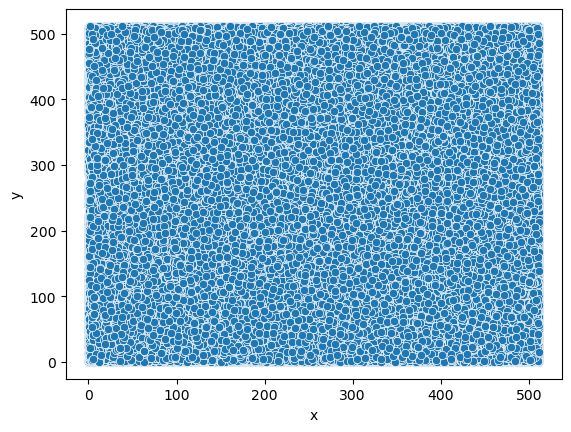

In [6]:
sns.scatterplot(x="x", y="y", data=df.loc[:, ["x", "y"]])

### Export

In [7]:
output_name = f'{output_dir}places_o{num_objects}_q{num_queries}'

if (should_scale and not spatial_uni):
    output_name += f'_scaled'

if (spatial_uni):
    output_name += f'_spatialuni'

df.to_json(f'{output_name}.json', orient='records', lines=True)
print(f'{output_name}.json')

../../data/exported/places_o200000_q2500000_spatialuni.json
